<a href="https://colab.research.google.com/github/wzinkann/wzinkann/blob/main/Copy_of_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Will Zinkann



## Intro /Problem Statement
Fake news is currently viewed as one of the largest threats to democracy and journalism. Growing up, it was taught that one should not believe everything that they read on the internet. With that being said, humans have been proven time and time again to lack proficiency in differentiating truth from lies when overloaded with deceptive information. Our society is plagued with misinformation, but there are ways to cure it. What this project is designed to do is create a model that will accurately classify certain articles as fake or true. Advantages that this has is that there is no half-classification, so-to-say, all articles are either fake or true. Some difficulty that will be found is that text analysis can be a long process especially with the close to 40,000 articles that will be used for this data set. At the end of this project, trends should be found that can help distinguish fake news and hopefully the model will be strong enough to be able to confidently analyze fake news.



## Import Libraries

In [ ]:
import pandas as pd

In [ ]:
s = 'abc'
s = s[::-1]
s

'cba'

## Import Files, both files are loaded into the files section on the sidebar.

In [ ]:
fake_df = pd.read_csv('/content/Fake.csv')
print('Fake:',fake_df.head())
true_df = pd.read_csv('/content/True.csv')
print('\nTrue:',true_df.head())

Fake:                                                title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]

True:                                                title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 

[5 rows x 4 columns]


## It would be advantageous for both of the dataframes to be combined, in order to properly create training and test sets. Before combining, both dataframes are going to get a new boolean coloumn, 'fake', all rows from 'fake_df' will be True and 'True_df' Being false.

In [ ]:
# Add new column
fake_df['fake'] = True
true_df['fake'] = False

# Concat df's
#news_df = fake_df.append(true_df)
# print('Head:',news_df.head())
# print('\nTail:',news_df.tail())

## It would also be helpful to save this df, df.to_csv will pull them right here.

In [ ]:
#news_df.to_csv('news_df.csv')

## Now news_df can be inserted as a pandas much faster (this may potentially be commented out).

In [ ]:
news_df = pd.read_csv('/content/news_df.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## And now before we get started, it is important to anylyze what the data frame contains to fully understand the data.

In [ ]:
print('dTypes:\n',news_df.dtypes)
print('\nSize:\n',news_df.size)
print('\nAxes:\n',news_df.axes)

dTypes:
 Unnamed: 0     int64
title         object
text          object
subject       object
date          object
fake            bool
dtype: object

Size:
 269388

Axes:
 [RangeIndex(start=0, stop=44898, step=1), Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'fake'], dtype='object')]


## Assign fake classifications to variable and split up data into training and testing sets. Since the two types of rows (real and fake) are seperated, shuffle(df) will be used before.

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

news_df = shuffle(news_df)

fake = news_df.fake

x_train,x_test,y_train,y_test = train_test_split(news_df['text'], fake, test_size=0.2, random_state=7,shuffle=True)

## Now we train our model using the x_train

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

## Then, we’ll predict on the test set from the TfidfVectorizer using a PassiveAggressiveClassifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.4%


## As you can see, we predicted an incredibly high accuracy of around 93.33%. From what we have learned this is a minor redflag as it is odd for a classifier to be this high. Let's take a look under the hood to see what is making this so.

## Here is all of the data for the most commonly used words in each dataset.

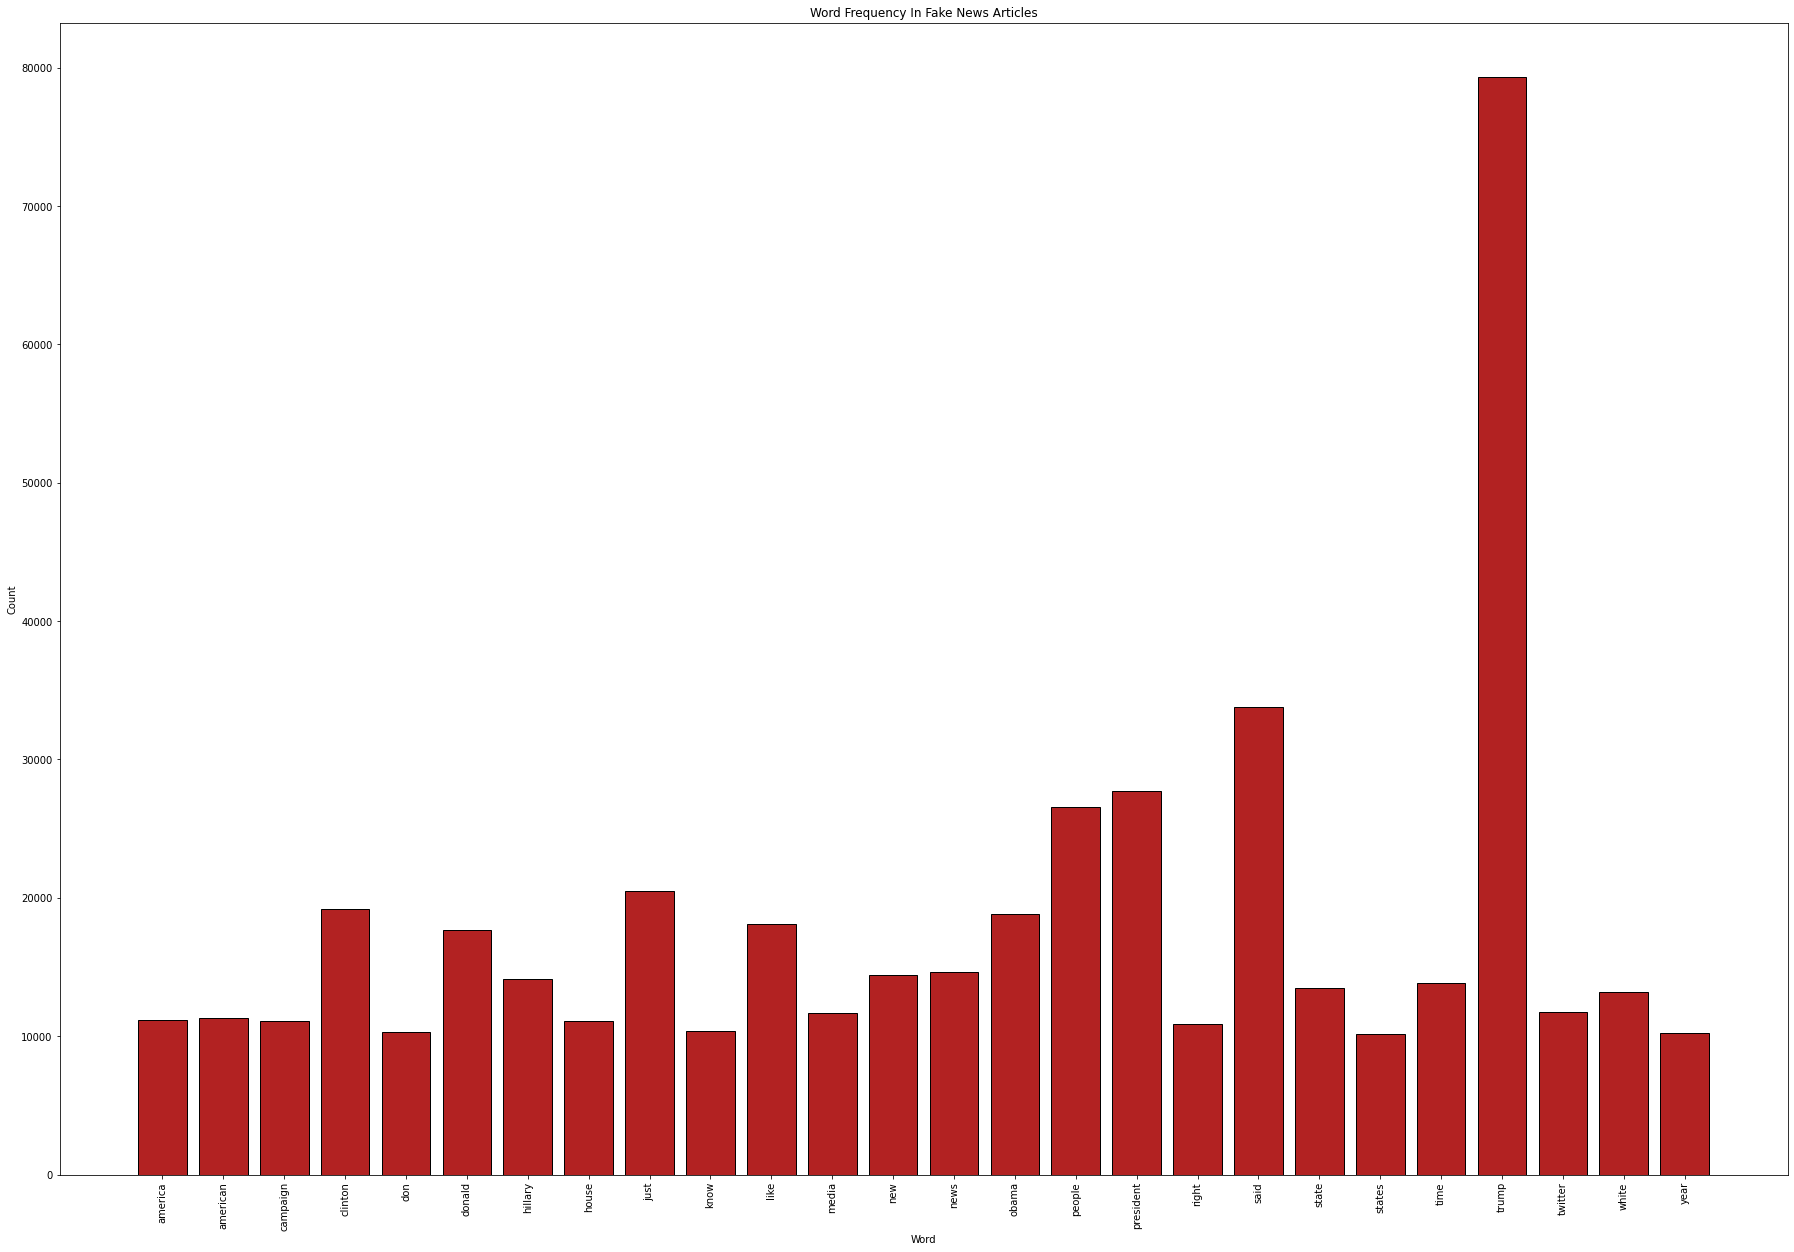

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

count_vect = CountVectorizer(lowercase=True, stop_words='english', max_features=500)
data_counts = count_vect.fit_transform(fake_df.text)

x = count_vect.get_feature_names()
y = np.array(data_counts.todense()).sum(axis=0)

words_df_fake = pd.DataFrame()
words_df_fake['term'] = x
words_df_fake['count'] = y

words_df_fake = words_df_fake[words_df_fake['count'] > 7500]
x = words_df_fake['term']
y = words_df_fake['count']

fig = plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(x,y,color='firebrick',ec='k')
plt.xlabel('Word')
ax.tick_params(axis='x', labelrotation = 90)
plt.ylabel('Count')
plt.title('Word Frequency In Fake News Articles')
plt.show()

## And for the real news

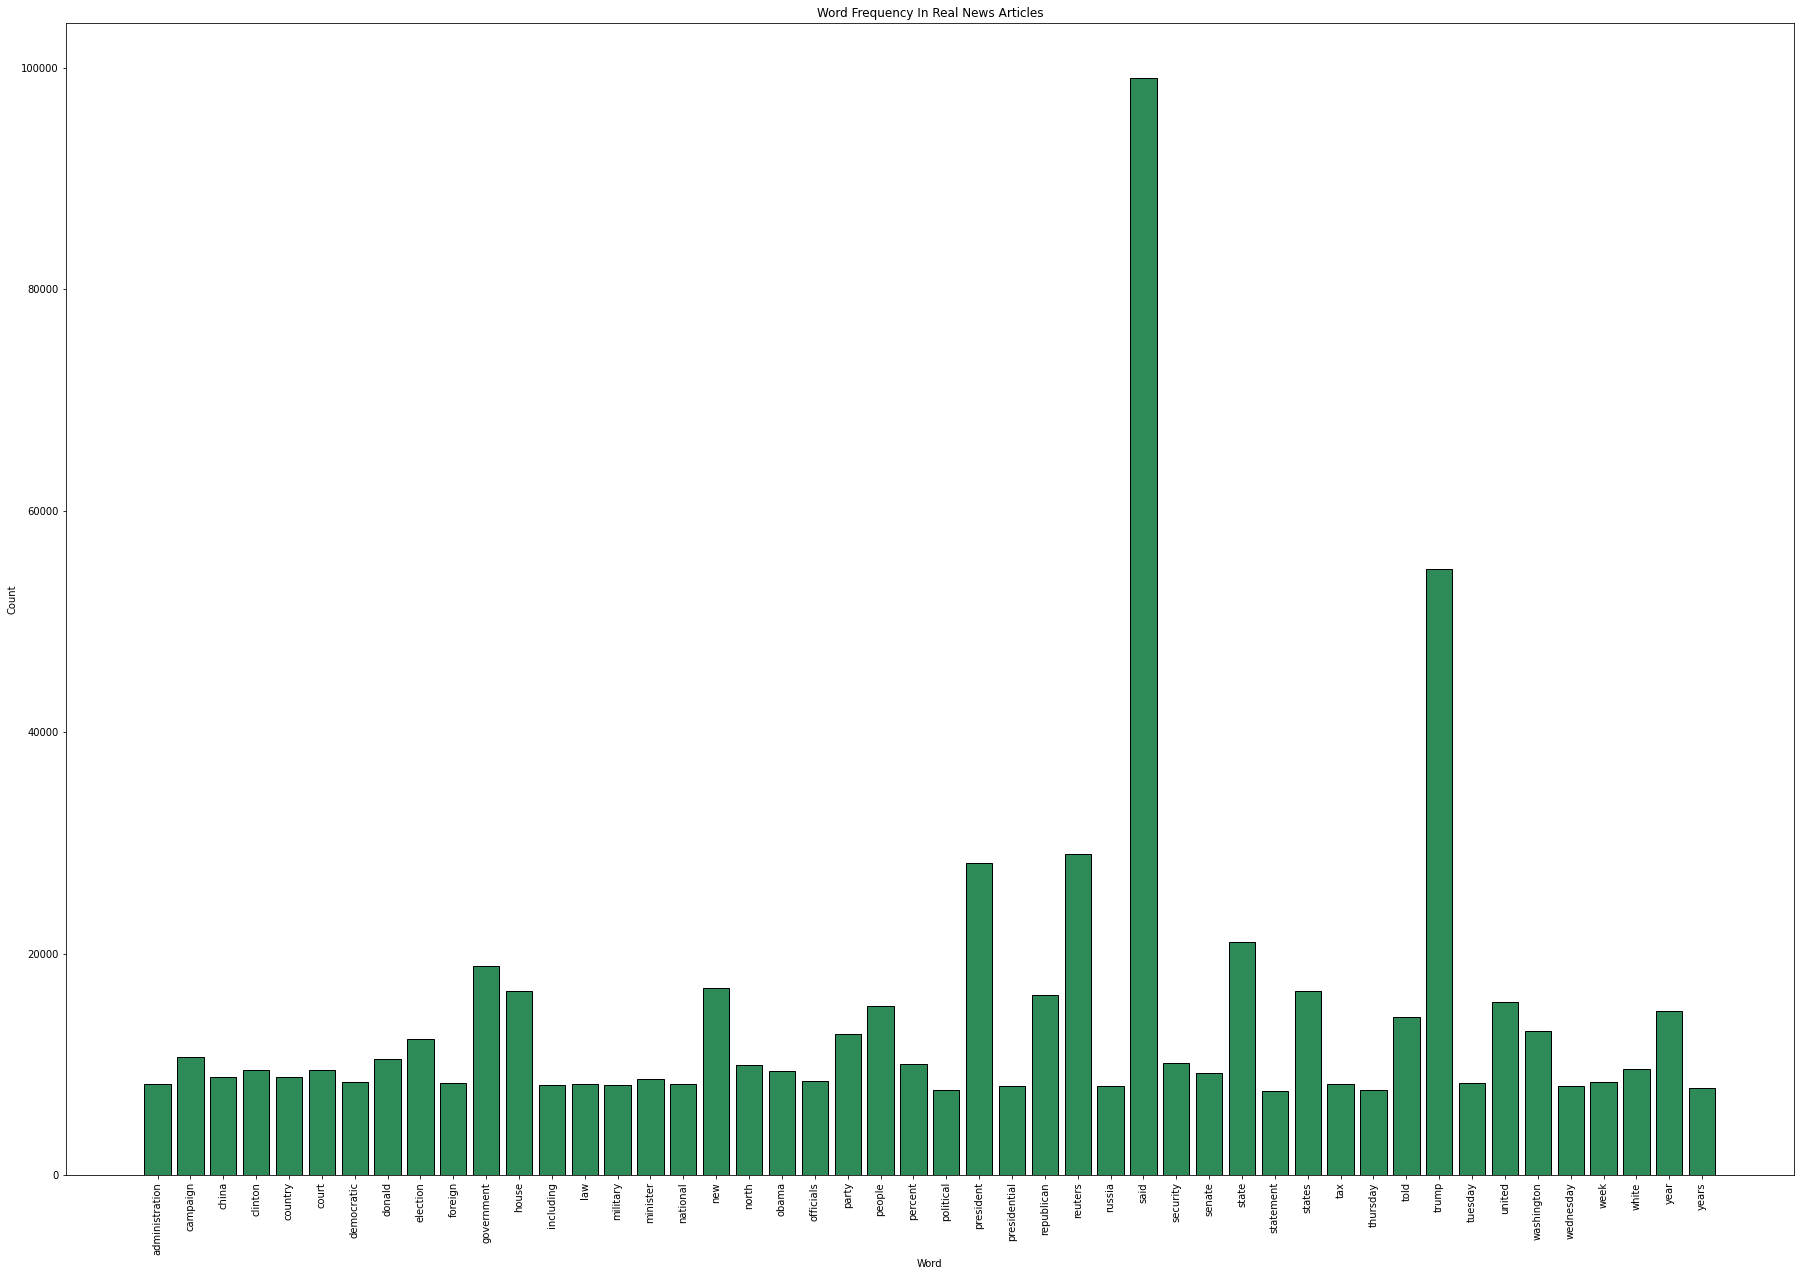

In [ ]:
count_vect = CountVectorizer(lowercase=True, stop_words='english', max_features=500)
data_counts = count_vect.fit_transform(true_df.text)

x = count_vect.get_feature_names()
y = np.array(data_counts.todense()).sum(axis=0)

words_df_true = pd.DataFrame()
words_df_true['term'] = x
words_df_true['count'] = y

words_df_true = words_df_true[words_df_true['count'] > 7500]
x = words_df_true['term']
y = words_df_true['count']

fig = plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(x,y,color='seagreen',ec='k')
plt.xlabel('Word')
ax.tick_params(axis='x', labelrotation = 90)
plt.ylabel('Count')
plt.title('Word Frequency In Real News Articles')
plt.show()

## Find all of the unique words in both most-common-wordlists.

In [ ]:
d = {'fake':words_df_fake.term,'true':words_df_true.term}
words_df = pd.DataFrame(d, columns=['fake', 'true'])
words_df2 = words_df.values.ravel()
uniqueWords = pd.unique(words_df2)
print('Unique words in both datasets')
for x in range(len(uniqueWords)):
  print(uniqueWords[x])

Unique words in both datasets
nan
administration
america
american
campaign
clinton
china
country
court
democratic
don
donald
election
foreign
government
hillary
house
including
just
know
law
like
media
military
minister
national
new
news
north
obama
officials
people
party
percent
political
president
presidential
republican
right
reuters
said
russia
security
senate
state
states
statement
time
tax
trump
thursday
told
twitter
tuesday
united
washington
white
wednesday
week
year
years


## See what words were most commonly found in both datasets

In [ ]:
x = words_df['fake']
y = words_df['true']

print('Words in both most frequent list')
pd.Series(list(set(x).intersection(set(y))))

Words in both most frequent list


0           NaN
1         state
2         trump
3     president
4        states
5        donald
6        people
7          said
8           new
9         obama
10     campaign
11        house
12      clinton
13         year
14        white
dtype: object

## See what words were different in both datasets

In [ ]:
words_in_one = pd.Series(list(set(x).symmetric_difference(set(y))))
words_in_one

0         washington
1            hillary
2            foreign
3     administration
4           military
5             russia
6            twitter
7         republican
8               know
9             senate
10              just
11              week
12              like
13             north
14               tax
15             china
16           country
17             party
18             media
19              news
20      presidential
21         political
22           percent
23          national
24         wednesday
25             right
26              told
27         including
28          american
29              time
30        government
31          thursday
32          election
33          security
34           tuesday
35             court
36             years
37               don
38          minister
39            united
40               law
41         officials
42        democratic
43           america
44           reuters
45         statement
dtype: object

## Look to see what data set these belong to.

In [ ]:
unique_fake_words = []
unique_true_words = []

for i in words_in_one:
  if i in words_df['true'].values:
    unique_true_words.append(i)
  else:
    unique_fake_words.append(i)

print('Words in true\n')
for x in range(len(unique_true_words)):
  print(unique_true_words[x])

print('\n\nWords in fake\n')
for x in range(len(unique_fake_words)):
  print(unique_fake_words[x])

Words in true

washington
foreign
administration
military
russia
republican
senate
week
north
tax
china
country
party
presidential
political
percent
national
wednesday
told
including
government
thursday
election
security
tuesday
court
years
minister
united
law
officials
democratic
reuters
statement


Words in fake

hillary
twitter
know
just
like
media
news
right
american
time
don
america


## Test model on new data, now I am creating a new dataframe of 6 news articles, 3 fake and 3 real, and testing the model on them.

In [ ]:
## Insert data

data = {'title': ['Accused Child Molesting Senate Candidate Roy Moore Sides With Putin Over Reagan (VIDEO)',
                  'Republican National Committee: Better A Pedophile Than A Democrat In The U.S. Senate',
                  'Americans Once Elected A President After He Was Accused Of Raping A 13-Year-Old Girl',
                  
                  'Republican tax bill retains U.S. electric vehicle tax credit',
                  'China says confident in economic relations with U.S. ahead of Trump visit',
                  'Applause, laughter as wounded lawmaker Scalise returns to Congress'
                  ],
        
        'text': ['Ronald Reagan is largely seen as the Messiah of the Republican Party. Despite how long it has been since the man was president, he has always remained the high standard of GOP morality for potential office holders. That is, until now. Reagan is likely rolling over in his grave at the idea of the state of his party with Donald Trump as its standard-bearer, and he s likely doing the same at the prospect of a bigoted accused child molester like Roy Moore (R-AL) being the next GOP Senator from Alabama. Well, now Reagan has another reason to hate Moore: He s clearly in the pocket of Russian autocrat Vladimir Putin just like Donald Trump is.During an interview where he s talking about Americans being the face of  evil  in the world right now, Moore indicates that Putin s harsh and murderous treatment of LGBTQ people in Russia is something he would like to see happen in the United States. Then, he does something most appalling, and goes on to give Putin a message in Russian. Now, no one knows where a bigoted, backwoods buffoon like Roy Moore would learn Russian. After all, he s barely left Alabama, where he has spent the last 40+ years wreacking havoc and just basically cementing Alabama s place as America s bigoted boil on the butt of humanity wherever and whenever he can. However, he managed to learn enough Russian to dog whistle to Putin in that interview. That should disturb us all. Not only is the man being a homophobe, a racist, a misogynist, and more than likely a child molester, he s also a Russian stooge.America, we can do better. We have enough Russian puppets at the highest levels of government. Lord knows we don t need one in the United States Senate.Watch the appalling video below:Please watch this until the end, Roy Moore sides with Putin over Reagan, says that America is the focus of evil in the world, and sends a nice message to Putin in Russian. pic.twitter.com/wFgDkvzEhT  The Reagan Battalion (@ReaganBattalion) December 10, 2017Featured image via Drew Angerer/Getty Images',
                 'By now, the whole world knows that Alabama Senate candidate Roy Moore (R-Of Course) was banned from an Alabama mall and the YMCA for creeping on little girls. He has been accused of molesting young girls as young as age fourteen. Of course, when the allegations first came out and the uproar and backlash began, everyone, regardless of politics, reacted with outrage. However, the GOP s outrage was often much more muted. Further, it took awhile for the Republican National Committee to pull their support for Moore, despite the deeply disturbing allegations of his being a pedophile. Well, now that the rage has died down, the RNC is back with a new message regarding this Senate race: Better a pedophile than a Democrat.Under cover of night, the RNC reinstated their support for Roy Moore, and an RNC official confirmed to The Hill that, quote, We can confirm our involvement in the Alabama Senate race. So, there you have it, folks. They literally want a child molester in the United States Senate rather than a Democrat. There are only a few voices from the right who are being brave on this one   and none of them are seeking re-election. Former Republican presidential nominee Mitt Romney tweeted that the GOP must not tolerate Moore:Roy Moore in the US Senate would be a stain on the GOP and on the nation. Leigh Corfman and other victims are courageous heroes. No vote, no majority is worth losing our honor, our integrity.  Mitt Romney (@MittRomney) December 4, 2017Outgoing Arizona GOP Senator Jeff Flake has actually said that he would vote for the Democratic candidate, Doug Jones, if he lived in Alabama, and former Jeb Bush adviser Tim Miller has actually endorsed and donated to Jones. Outgoing Pennsylvania moderate Republican Charlie Dent said he never supported Moore in the first place. Here s the video of Dent s takedown of Moore:There is also outspoken Trump critic and longtime GOP strategist Steve Schmidt, who went on national television and called Moore a pedophile:Other than that, though, it has been radio silence. After all, they need that vote. Besides, let s face it   the GOP writ large showed America and the world what they stand for when they elected Donald Trump.Featured image via Scott Olson/Getty Images',
                 'After an awful campaign filled with hateful rhetoric, American voters elected a man to lead the most powerful country on earth even after he was accused of raping a 13-year-old. The year was 2016 and the accused was an alleged billionaire, former reality show star and an admitted sexual predator. Still, even after the revelations, conservatives saw nothing wrong with Donald Trump s behavior. The plaintiff described the horrifying incident in which Trump and his friend Jeffrey Epstein allegedly raped a child. A lawsuit was filed which claims that threats were made in order for the victim to keep her mouth shut about what had just happened.Both Defendants let Plaintiff know that each was a very wealthy, powerful man and indicated that they had the power, ability, and means to carry out their threats. Indeed, Defendant Trump stated that Plaintiff shouldn t ever say anything if she didn t want to disappear like Maria, a 12-year-old female that was forced to be involved in the third incident with Defendant Trump and that Plaintiff had not seen since that third incident, and that he was capable of having her whole family killed.There was a witness who backed up  Jane Doe s  claims. According to the lawsuit, Trump and Epstein  sexually and physically  abused the then 13-year-old plaintiff and forced her  to engage in various perverted and depraved sex acts    including being  forced to manually stimulate Defendant Trump with the use of her hand upon Defendant Trump s erect penis until he reached sexual orgasm,  and being  forced to engage in an unnatural lesbian sex act with her fellow minor and sex slave, Maria Doe, age 12, for the sexual enjoyment of Defendant Trump    after luring her to a  series of underage sex parties  by promising her  money and a modeling career,  according to Snopes.Trump has admitted knowing Epstein for 15 years. Epstein was named in multiple similar lawsuits, served 13 months in jail, and is registered as a sex offender for life.The lawsuit which was filed in California on April 26, 2016, was dismissed over technical filing errors and it was refiled in June of the same year, then dropped again in November after the plaintiff received death threats.Last year, Trump was also accused by 16 women of sexually harassing or assaulting them. Conservatives went on to elect him knowing full well that he is a sexual predator because he said so in the Access Hollywood tape.History will not be kind as it remembers November of 2016.Photo by Alex Wong/Getty Images.',
                 
                 'WASHINGTON (Reuters) - A compromise Republican tax bill released late Friday does not eliminate a $7,500 electric vehicle tax credit as Republicans in the U.S. House of Representatives had previously proposed. The measure follows the lead of the Senate version approved last month that did not eliminate the credit. Killing the credit could have hurt automakers like General Motors Co (GM.N), Volkswagen AG (VOWG_p.DE), Tesla Inc (TSLA.O) and Nissan Motor Co (7201.T). Consumers under current law are eligible for a $7,500 tax credit to defray the cost of plug-in electric vehicles. The electric vehicle tax credit starts to phase out after a manufacturer sells 200,000 plug-in vehicles. After an automaker hits that point, the $7,500 tax credit is still available for at least three more months before phasing out.  Consumers are currently allowed to take the credit on vehicles until the manufacturer hits 200,000 plug-in vehicles sold. Electric vehicles have expensive batteries that make them pricier than gasoline-powered vehicles. The Electric Drive Transportation Association said in a statement late Friday it was pleased the credit would remain in law. “The credit supports innovation and job creation while helping drivers access advanced vehicle technology,” the group said. More than 50 automakers and other companies and groups released a letter earlier this week urging Congress to retain the credit, including Ford Motor Co (F.N), BMW AG (BMWG.DE), GM, Uber Technologies Inc. Former President Barack Obama repeatedly proposed hiking the tax credit for electric vehicles to $10,000 and converting it to a point-of-sale rebate, but Congress did not approve the measure. Automakers face mandates from California and a dozen other states to produce a rising number of zero-emission vehicles and have said the credits are essential to meeting requirements.',
                 'BEIJING (Reuters) - China has confidence in its economic relations with the United States going forward and will continue to open up and provide broader market access, Vice Foreign Minister Zheng Zeguang said on Friday. Zheng was speaking at a briefing about next week’s visit to China by President Donald Trump. ',
                 'WASHINGTON (Reuters) - Members of the U.S. House of Representatives put bitter party divisions aside for a long standing ovation on Thursday as Representative Steve Scalise returned for the first time since he was shot and wounded in June. Leaning on a cane but walking on his own, Scalise, 51, entered a packed House chamber to applause and loud cheers from his fellow members of Congress. “You have no idea how great this feels to be back here at work in the people’s House,” said Scalise, the No. 3 Republican in the chamber, standing at a desk in the Republican section  after he was greeted with hugs and high-fives from members of his own party and Democrats. He thanked the Capitol police officers he credited with saving his life, world leaders who had contacted him and members of his medical team, who were sitting in the crowded visitors gallery overlooking the House floor. House Speaker Paul Ryan’s voice cracked as he introduced Scalise. “The chair wishes to mark the return of our dear friend and colleague from Louisiana, Mr. Steve Scalise,” Ryan said. “Our prayers have been answered.” Scalise gave an emotional speech, interrupted by frequent applause, thanking his family and referring to innate optimism he partly attributed to being from Louisiana, referring to the attitude of “joie de vivre” (joy of life) in a state with a heavy French influence.  “When I come back into this chamber today, just seeing the faces of all of you, it just means more than you can imagine,” Scalise said. Scalise was among Republican lawmakers attacked June 14 in the Washington suburb of Alexandria, Virginia, by a gunman who opened fire on them while they were practicing for a charity baseball game against Democrats. He underwent repeated surgeries before being released from the hospital in late July. Scalise was shot in the hip by a gunman who had a history of posting angry messages against Republican President Donald Trump.'],
        
        'subject': ['News','News','News','News','News','News'],
        'data': ['December 11, 2017','December 5, 2017','November 29, 2017','December 16, 2017','November 3, 2017','September 28, 2017'],
        'fake': [True,True,True,False,False,False]
        }

final_test_df = pd.DataFrame(data, columns=['title','text','subject','data','fake'])
final_test_df

,title,text,subject,data,fake
0,Accused Child Molesting Senate Candidate Roy M...,Ronald Reagan is largely seen as the Messiah o...,News,"December 11, 2017",True
1,Republican National Committee: Better A Pedoph...,"By now, the whole world knows that Alabama Sen...",News,"December 5, 2017",True
2,Americans Once Elected A President After He Wa...,After an awful campaign filled with hateful rh...,News,"November 29, 2017",True
3,Republican tax bill retains U.S. electric vehi...,WASHINGTON (Reuters) - A compromise Republican...,News,"December 16, 2017",False
4,China says confident in economic relations wit...,BEIJING (Reuters) - China has confidence in it...,News,"November 3, 2017",False
5,"Applause, laughter as wounded lawmaker Scalise...",WASHINGTON (Reuters) - Members of the U.S. Hou...,News,"September 28, 2017",False


## Conclusions / Discussion
This project was more difficult than we originally anticipated. The main model of the project worked better than was planned though. With an accuracy of 93.33% we had an incredibly accurate model. This is can be measured as the quality of our work as well as the different words that were identified as unique to the most common word in the fake and true articles. Looking at the words there are clear differences between these datasets. The most notable is that the top unique word used in the fake news dataset was 'Hillary' this is obviously since many articles in this data set are from the years 2016-2017 around the time of the Trump - Clinton election, where 'fake news' was a notable headline. The main issue that came up was when we tried to fit the model to the outside found news data set that we put togther. since it was time consuming to collect all of the data to fill in the rows of the ne data frame, only 6 sources were collected. We still expected to see if our model would be able to predict the legimatcy of all 6 articles. The problem arose when trying to fit the tfidf model to the new dataframe. Since the model was trained to 3,000+ rows it was not allowing us to fit it to the new data of only 6 rows. We left in the new dataframe to give some insight on how this massive dataset we used got put togther, pretty incredible. But because of this we decided that we hit the 'moderate' section of the grade target, since we were still very happy with our findings and also branched out and learned about a new classifier Passive Aggressive.